In [ ]:
#Mengimpor library
import pandas as pd #Untuk membaca, menulis data, membuat dataframe, data cleaning, analisis data
import numpy as np
import datetime as dt
import seaborn as sns
import math
import sklearn
from itertools import cycle
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, explained_variance_score, r2_score
from sklearn.metrics import mean_poisson_deviance, mean_gamma_deviance, accuracy_score
from sklearn.svm import SVR
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import plotly.express as px
from plotly.subplots import make_subplots
from sklearn.model_selection import train_test_split,GridSearchCV,RandomizedSearchCV
from scipy.stats import uniform, gamma

In [ ]:
data = pd.read_excel("https://raw.githubusercontent.com/luthfi2712/Uji/main/Data%20Harga%20Beras%20Jabar.xlsx")
data.head()
# Rata2 mengimport data 15 - 30 detik

,Tanggal,Beras Premium,Beras Medium
0,2023-03-01,12800,11620
1,2023-03-02,12770,11540
2,2023-03-03,12790,11460
3,2023-03-04,12770,11640
4,2023-03-05,12720,11590


In [ ]:
#Mengecek ukuran data
data.shape

(367, 3)

In [ ]:
#mengecek tipe data
data.dtypes

Tanggal          datetime64[ns]
Beras Premium             int64
Beras Medium              int64
dtype: object

In [ ]:
#mengecek nilai yang hilang
data.isna().sum()

Tanggal          0
Beras Premium    0
Beras Medium     0
dtype: int64

In [ ]:
#Mengcek nilai Nan
data.isna().any()

Tanggal          False
Beras Premium    False
Beras Medium     False
dtype: bool

In [ ]:
#Cek type Data
print("Type data Tanggal: ", type(data['Tanggal'][0]))
print("Type data Beras Premium: ", type(data['Beras Premium'][0]))
print("Type data Beras Medium: ", type(data['Beras Medium'][0]))

Type data Tanggal:  <class 'pandas._libs.tslibs.timestamps.Timestamp'>
Type data Beras Premium:  <class 'numpy.int64'>
Type data Beras Medium:  <class 'numpy.int64'>


In [ ]:
#Konversi tanggal dari bentuk string ke format tanggal dan dijadikan indeks
data['Tanggal'] = pd.to_datetime(data.Tanggal)
data.head()

,Tanggal,Beras Premium,Beras Medium
0,2023-03-01,12800,11620
1,2023-03-02,12770,11540
2,2023-03-03,12790,11460
3,2023-03-04,12770,11640
4,2023-03-05,12720,11590


In [ ]:
#Menyortir kumpulan data berdasarkan format tanggal
data.sort_values(by='Tanggal', inplace=True)
data.head()

,Tanggal,Beras Premium,Beras Medium
0,2023-03-01,12800,11620
1,2023-03-02,12770,11540
2,2023-03-03,12790,11460
3,2023-03-04,12770,11640
4,2023-03-05,12720,11590


In [ ]:
data.shape

(367, 3)

#Ekspolarasi Data

In [ ]:
#Mendeskripsikan data secara statistik
data.describe()

,Tanggal,Beras Premium,Beras Medium
count,367,367.000000,367.000000
mean,2023-08-31 00:00:00,13561.444142,12309.891008
min,2023-03-01 00:00:00,12300.000000,11130.000000
25%,2023-05-31 12:00:00,12690.000000,11530.000000
50%,2023-08-31 00:00:00,13450.000000,12250.000000
75%,2023-11-30 12:00:00,14420.000000,13000.000000
max,2024-03-01 00:00:00,14870.000000,13680.000000
std,NaN,849.353876,763.464915


In [ ]:
#Korelasi data
data.corr()

,Tanggal,Beras Premium,Beras Medium
Tanggal,1.000000,0.910465,0.882995
Beras Premium,0.910465,1.000000,0.985294
Beras Medium,0.882995,0.985294,1.000000


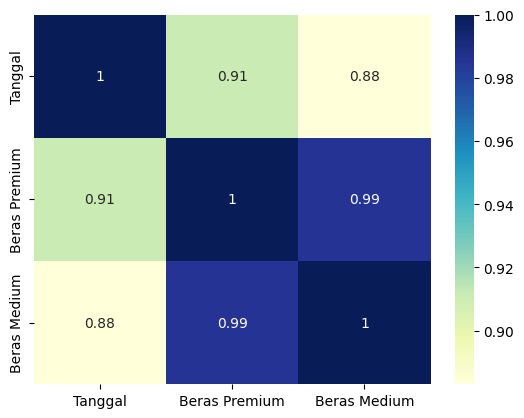

In [ ]:
#Membuat peta heatmap dari matriks korelasi
sns.heatmap(data.corr(), cmap="YlGnBu", annot = True)
plt.show()

In [ ]:
data2 = data[['Tanggal', 'Beras Premium', 'Beras Medium']]
data2.head()

,Tanggal,Beras Premium,Beras Medium
0,2023-03-01,12800,11620
1,2023-03-02,12770,11540
2,2023-03-03,12790,11460
3,2023-03-04,12770,11640
4,2023-03-05,12720,11590


In [ ]:
data2.shape

(367, 3)

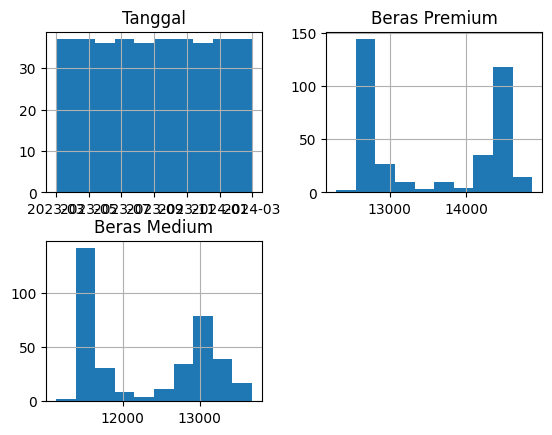

In [ ]:
#Membuat Histogram
viz=data2[['Tanggal', 'Beras Premium', 'Beras Medium']]
viz.hist()
plt.show()

#Hubungan Linearitas fitur-fitur

In [ ]:
data2.rename(columns={'Beras Premium':'Beras_Premium','Beras Medium':'Beras_Medium'}, inplace= True)
data2.head()

,Tanggal,Beras_Premium,Beras_Medium
0,2023-03-01,12800,11620
1,2023-03-02,12770,11540
2,2023-03-03,12790,11460
3,2023-03-04,12770,11640
4,2023-03-05,12720,11590


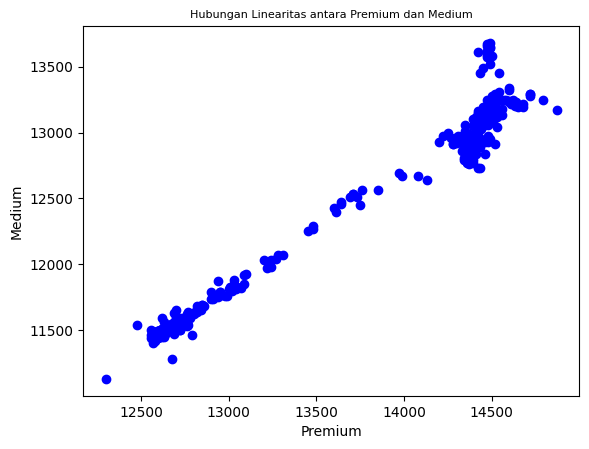

In [ ]:
plt.scatter(data2.Beras_Premium, data2.Beras_Medium, color='blue')
plt.title('Hubungan Linearitas antara Premium dan Medium', fontsize=8)
plt.xlabel("Premium")
plt.ylabel("Medium")
plt.show()

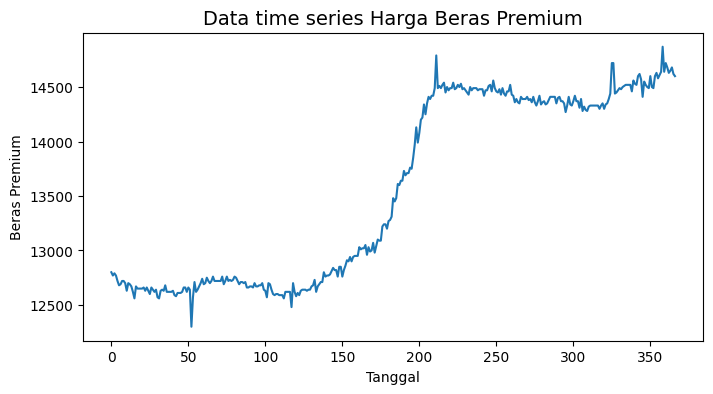

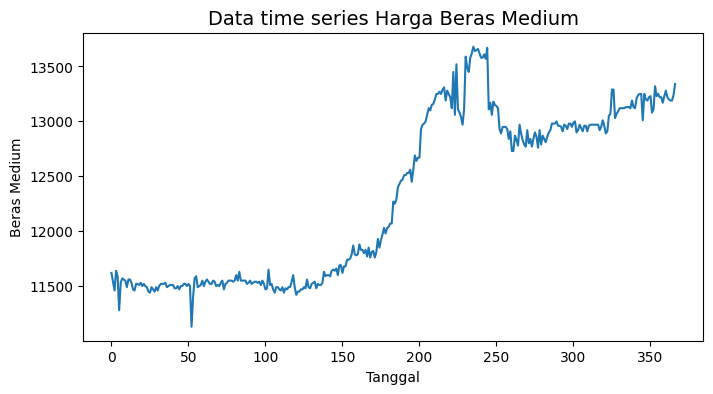

In [ ]:
#plot datatime series harga emas
plt.figure(figsize=(8,4))
plt.plot(data2.Beras_Premium)
plt.xlabel('Tanggal', fontsize=10)
plt.ylabel('Beras Premium', fontsize=10)
plt.title('Data time series Harga Beras Premium', fontsize=14)
plt.show()

#plot datatime series harga emas
plt.figure(figsize=(8,4))
plt.plot(data2.Beras_Medium)
plt.xlabel('Tanggal', fontsize=10)
plt.ylabel('Beras Medium', fontsize=10)
plt.title('Data time series Harga Beras Medium', fontsize=14)
plt.show()

In [ ]:
#data2.groupby(data2['Date'] : mengelompokkan data dalam objek dataFrame
#dt.strftime('%B') : mengubah nilai tanggal menjadi format teks bulan
#untuk membandingkan rata2 nilai 'Open' dan 'Close' untuk setiap nulan
perbandingan= data2.groupby(data2['Tanggal'].dt.strftime('%B'))[['Beras_Premium','Beras_Medium']].mean().sort_values(by='Beras_Premium')
perbandingan.head()

,Beras_Premium,Beras_Medium
Tanggal,,
April,12625.000000,11494.666667
June,12627.333333,11502.333333
May,12715.806452,11539.354839
July,12729.032258,11567.419355
March,12731.562500,11565.312500


In [ ]:
#Membuat grafik batang
fig = go.Figure()

fig.add_trace(go.Bar(
    x=perbandingan.index, #indeks bulan dari perbandingan
    y=perbandingan['Beras_Premium'],#nilai Open dari perbandingan
    name='Harga Beras Premium ',
    marker_color='crimson'
))
fig.add_trace(go.Bar(
    x=perbandingan.index,
    y=perbandingan['Beras_Medium'],
    name='Harga Beras Medium',
    marker_color='lightsalmon'
))

#barmode='group' mengatur tampilan bar chart menjadi grup
#xaxis_tickangle=-45 mengatur sudut kemiringan label pada sumbu x menjadi -45 derajat.
fig.update_layout(barmode='group', xaxis_tickangle=-45,
                  title='Perbandingan bulan antara harga Beras aktual, Premium dan Medium')
fig.show()

In [ ]:
data2.groupby(data2['Tanggal'].dt.strftime('%B'))[['Beras_Premium','Beras_Medium']].min()

,Beras_Premium,Beras_Medium
Tanggal,,
April,12300,11130
August,12900,11740
December,14270,12760
February,14410,13010
January,14280,12890
July,12590,11450
June,12480,11420
March,12560,11280
May,12660,11470


In [ ]:
#perbandingan nilai tertinggi
perbandingan_high= data2.groupby(data2['Tanggal'].dt.strftime('%B'))[['Beras_Premium','Beras_Medium']].max()
#perbandingan nilai terendah
perbandingan_low= data2.groupby(data2['Tanggal'].dt.strftime('%B'))[['Beras_Premium','Beras_Medium']].min()

In [ ]:
#Membuat grafik batang
fig = go.Figure()
fig.add_trace(go.Bar(
    x=perbandingan_high.index,
    y=perbandingan_high,
    name='Harga Bers Tertinggi',
    marker_color='rgb(0, 153, 204)'
))
fig.add_trace(go.Bar(
    x=perbandingan_low.index,
    y=perbandingan_low,
    name='Harga Beras Terendah',
    marker_color='rgb(255, 128, 0)'
))

fig.update_layout(barmode='group',
                  title='Harga Beras Tertinggi dan Terendah setiap bulan')
fig.show()

In [ ]:
names = cycle(['Harga Beras Premium', 'Harga Beras Medium'])

fig = px.line(data2, x=data2.Tanggal, y=[data2['Beras_Premium'], data2['Beras_Medium']],
             labels={'Tanggal': 'Tanggal','value':'Harga Beeras'})
fig.update_layout(title_text='Bagan Analisis', font_size=15, font_color='black',legend_title_text='Parameter')
#mengupdate nama label pada setiap garis menggunakan fungsi lamda
fig.for_each_trace(lambda t:  t.update(name = next(names)))
#mengupdate konfigurasi sumbu x untuk tidak menampilkan grid(garis pembantu)
fig.update_xaxes(showgrid=False)
#mengupdate konfigurasi sumbu y untuk tidak menampilkan grid(garis pembantu)
fig.update_yaxes(showgrid=False)
fig.show()

In [ ]:
closedata21 = data2[['Tanggal', 'Beras_Premium']]
print("Ukuran data: ", closedata21.shape)

closedata22 = data2[['Tanggal', 'Beras_Medium']]
print("Ukuran data: ", closedata22.shape)

Ukuran data:  (367, 2)
Ukuran data:  (367, 2)


In [ ]:
fig = px.line(closedata21, x=closedata21.Tanggal, y=closedata21.Beras_Premium,labels={'Tanggal':'Tanggal','Harga':'Harga Beras Premium'})
#mengupdate konfigurasi garis pada grafik
fig.update_traces(marker_line_width=2, opacity=0.8)
#Mengupdate layout grafik dengan warna latar belakang plot menjadi putih (white), ukuran font 15, dan warna font hitam.
fig.update_layout(title_text='Grafik Harga Beras Premium', plot_bgcolor='white', font_size=15, font_color='black')
#Mengupdate konfigurasi sumbu x dan y untuk tidak menampilkan grid(garis pembantu)
fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)
fig.show()

fig = px.line(closedata22, x=closedata22.Tanggal, y=closedata22.Beras_Medium,labels={'Tanggal':'Tanggal','Harga':'Harga Beras Medium'})
#mengupdate konfigurasi garis pada grafik
fig.update_traces(marker_line_width=2, opacity=0.8)
#Mengupdate layout grafik dengan warna latar belakang plot menjadi putih (white), ukuran font 15, dan warna font hitam.
fig.update_layout(title_text='Grafik Harga Beras Medium', plot_bgcolor='white', font_size=15, font_color='black')
#Mengupdate konfigurasi sumbu x dan y untuk tidak menampilkan grid(garis pembantu)
fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)
fig.show()

#Normalisasi

In [ ]:
# Menampilkan data awal
print("Data awal:")
print(data.head())

# Mengambil kolom Beras Premium
beras_premium = data[['Beras Premium']]

# Melakukan normalisasi pada kolom Beras Premium
scaler = MinMaxScaler(feature_range=(0, 1))
beras_premium_normalized = scaler.fit_transform(beras_premium)

# Mengubah hasil normalisasi menjadi DataFrame
beras_premium_normalized_df = pd.DataFrame(beras_premium_normalized, columns=['Beras_Premium_Normalized'])

# Menampilkan hasil normalisasi
print("\nData Beras Premium setelah normalisasi:")
print(beras_premium_normalized_df.head())

Data awal:
     Tanggal  Beras Premium  Beras Medium
0 2023-03-01          12800         11620
1 2023-03-02          12770         11540
2 2023-03-03          12790         11460
3 2023-03-04          12770         11640
4 2023-03-05          12720         11590

Data Beras Premium setelah normalisasi:
   Beras_Premium_Normalized
0                  0.194553
1                  0.182879
2                  0.190661
3                  0.182879
4                  0.163424


In [ ]:
# Salin data untuk Beras Premium
close_stock1 = data2.copy()  # Mengcopy data asli
scaler = MinMaxScaler(feature_range=(0, 1))
closedata21 = scaler.fit_transform(data2[['Beras_Premium']].values.reshape(-1, 1))
print("Shape of closedata21:", closedata21.shape)

# Salin data untuk Beras Medium
close_stock2 = data2.copy()  # Mengcopy data asli
scaler = MinMaxScaler(feature_range=(0, 1))
closedata22 = scaler.fit_transform(data2[['Beras_Medium']].values.reshape(-1, 1))
print("Shape of closedata22:", closedata22.shape)

Shape of closedata21: (367, 1)
Shape of closedata22: (367, 1)


#Beras Premium

Fitting 5 folds for each of 36 candidates, totalling 180 fits
   Train_Predict_pre  Data_Aktual
0       12792.084879      12770.0
1       12764.960227      12790.0
2       12782.986057      12770.0
3       12764.960227      12720.0
4       12720.927879      12680.0

Best parameters found by GridSearchCV:
{'C': 0.1, 'epsilon': 0.01, 'gamma': 1, 'kernel': 'rbf'}


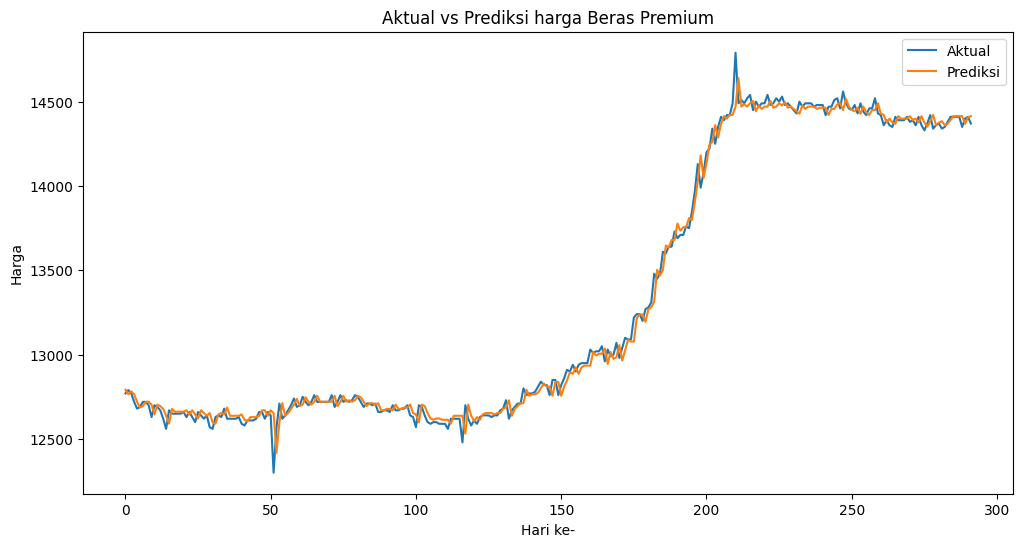

In [ ]:
beras_premium = data['Beras Premium']
# Select and normalize Beras Premium data
scaler = MinMaxScaler(feature_range=(0, 1))
closedata21 = scaler.fit_transform(beras_premium.values.reshape(-1, 1))

# Define time steps for input sequence (adjust as needed)
time_step = 1

# Function to create sequences for SVR training
def create_sequences(data, time_step):
    X, y = [], []
    for i in range(len(data) - time_step):
        X.append(data[i:(i + time_step), 0])
        y.append(data[i + time_step, 0])
    return np.array(X), np.array(y)

# Create sequences for training data
X_train_pre, y_train_pre = create_sequences(closedata21, time_step)

# Reshape X_train_pre for SVR
X_train_pre = X_train_pre.reshape(-1, time_step)

# Split the data into training and testing sets
split = int(0.8 * len(X_train_pre))
X_train, X_test = X_train_pre[:split], X_train_pre[split:]
y_train, y_test = y_train_pre[:split], y_train_pre[split:]

# Define parameter grid for GridSearchCV
param_grid = {
    'kernel': ['rbf'],
    'C': [0.1, 1, 10],
    'gamma': [0.01, 0.1, 1],
    'epsilon': [0.01, 0.1, 1, 10]
}

# Create GridSearchCV model
grid_search = GridSearchCV(SVR(), param_grid=param_grid, scoring='neg_mean_squared_error', cv=5, verbose=1, n_jobs=-1)

# Fit GridSearchCV
grid_search.fit(X_train, y_train)

# Get the best model
best_svr_pre = grid_search.best_estimator_

# Predict on training and testing data
train_predict_pre = best_svr_pre.predict(X_train)
test_predict_pre = best_svr_pre.predict(X_test)

# Inverse transform to get predictions in original scale
train_predict_pre = scaler.inverse_transform(train_predict_pre.reshape(-1, 1)).ravel()
test_predict_pre = scaler.inverse_transform(test_predict_pre.reshape(-1, 1)).ravel()
y_train_pre = scaler.inverse_transform(y_train.reshape(-1, 1)).ravel()
y_test_pre = scaler.inverse_transform(y_test.reshape(-1, 1)).ravel()

# Create DataFrame for predictions and actual data
svrtrain_pre = pd.DataFrame({
    "Train_Predict_pre": train_predict_pre,
    "Data_Aktual": y_train_pre  # Using original actual values for training data
})

# Print and show the results
print(svrtrain_pre.head())
print("\nBest parameters found by GridSearchCV:")
print(grid_search.best_params_)

# Plot predictions vs actual data
plt.figure(figsize=(12, 6))
plt.plot(svrtrain_pre.index, svrtrain_pre['Data_Aktual'], label='Aktual')
plt.plot(svrtrain_pre.index, svrtrain_pre['Train_Predict_pre'], label='Prediksi')
plt.title('Aktual vs Prediksi harga Beras Premium')
plt.xlabel('Hari ke-')
plt.ylabel('Harga')
plt.legend()
plt.show()

In [ ]:
# Print and show the results for training set
print("Training Set:")
print(svrtrain_pre.head(183))

Training Set:
     Train_Predict_pre  Data_Aktual
0         12792.084879      12770.0
1         12764.960227      12790.0
2         12782.986057      12770.0
3         12764.960227      12720.0
4         12720.927879      12680.0
..                 ...          ...
178       13237.764381      13200.0
179       13194.457430      13270.0
180       13270.469711      13280.0
181       13281.409541      13310.0
182       13314.330422      13480.0

[183 rows x 2 columns]


In [ ]:
# Menyimpan dataframe ke dalam file Excel
svrtrain_pre.to_excel('prediksi_premium.xlsx', index=False)

In [ ]:
# Mengambil data terakhir dari test_data dan mengubah menjadi matriks 2D dengan ukuran (1,-1)
x_input = X_test[len(X_test)-time_step:].reshape(1,-1)
temp_input = list(x_input)  # Mengubah menjadi list tunggal
temp_input = temp_input[0].tolist()

from numpy import array

lst_output = []  # Menyimpan hasil prediksi
n_steps = time_step  # Menginisialisasi n_steps dengan nilai time_step
i = 0
pred_days = 10  # Menentukan berapa kali loop while akan dijalankan
while(i < pred_days):  # Loop akan terus berjalan selama nilai i < pred_days

    if len(temp_input) > time_step:
        x_input = np.array(temp_input[1:])
        x_input = x_input.reshape(1, -1)

        yhat = best_svr_pre.predict(x_input)  # Melakukan prediksi dengan SVR
        temp_input.extend(yhat.tolist())  # Menambahkan hasil prediksi ke temp_input
        temp_input = temp_input[1:]  # Menyimpan data terbaru

        lst_output.extend(yhat.tolist())  # Menyimpan hasil prediksi
        i = i + 1  # Update iterasi

    else:
        yhat = best_svr_pre.predict(x_input)  # Melakukan prediksi
        temp_input.extend(yhat.tolist())  # Menambahkan hasil prediksi

        lst_output.extend(yhat.tolist())  # Menyimpan hasil prediksi
        i = i + 1  # Update iterasi

print("Output of predicted next days: ", len(lst_output))

Output of predicted next days:  10


In [ ]:
#membuat array numpy last days yang berisi angka 1 hingga time_step
last_days=np.arange(1,time_step+1)
day_pred=np.arange(time_step+1,time_step+pred_days+1)
print(last_days)
print(day_pred)

[1]
[ 2  3  4  5  6  7  8  9 10 11]


In [ ]:
temp_mat = np.empty((len(last_days) + pred_days + 1, 1))
temp_mat[:] = np.nan
temp_mat = temp_mat.reshape(1, -1).tolist()[0]

last_original_days_value = temp_mat
next_predicted_days_value = temp_mat

# Mengambil harga close 15 hari terakhir dari data Beras Premium
last_original_days_value[0:time_step + 1] = scaler.inverse_transform(closedata21[len(closedata21) - time_step:]).reshape(1, -1).tolist()[0]

# Mengambil prediksi harga close 10 hari ke depan untuk Beras Premium
next_predicted_days_value[time_step + 1:] = scaler.inverse_transform(np.array(lst_output).reshape(-1, 1)).reshape(1, -1).tolist()[0]

new_pred_plot = pd.DataFrame({
    'last_original_days_value': last_original_days_value,
    'next_predicted_days_value': next_predicted_days_value
})

names = cycle(['Harga Premium 15 hari terakhir', 'Prediksi harga premium 10 hari ke depan'])

fig = px.line(new_pred_plot, x=new_pred_plot.index, y=[new_pred_plot['last_original_days_value'],
                                                      new_pred_plot['next_predicted_days_value']],
              labels={'value': 'Harga Beras Premium', 'index': 'Timestamp'})
fig.update_traces(line_color='red', selector=dict(name='Harga Premium 15 hari terakhir'))
fig.update_traces(line_color='red', selector=dict(name='Prediksi harga premium 10 hari ke depan'))

fig.update_layout(title_text='Perbandingan 15 hari terakhir dengan 10 hari ke depan untuk Harga Beras Premium',
                  plot_bgcolor='white', font_size=15, font_color='black', legend_title_text='Harga')
fig.for_each_trace(lambda t: t.update(name=next(names)))

fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)
fig.show()

In [ ]:
prediksi = pd.read_excel('prediksi_premium.xlsx')
prediksi

,Train_Predict_pre,Data_Aktual
0,12792.084879,12770
1,12764.960227,12790
2,12782.986057,12770
3,12764.960227,12720
4,12720.927879,12680
...,...,...
287,14413.977975,14410
288,14413.977975,14350
289,14368.459792,14400
290,14406.567260,14410


In [ ]:
# Membaca DataFrame dari file Excel
prediksi = pd.read_excel('prediksi_premium.xlsx')

# Mengambil nilai terakhir dari kolom 'Train_Predict_pre'
last_value = prediksi['Train_Predict_pre'].iloc[-1]

# Membuat array dengan 10 nilai prediksi baru (contoh nilai acak)
next_predictions = np.random.randint(last_value - 50, last_value + 50, size=10)

# Membuat DataFrame baru untuk nilai prediksi 10 hari ke depan
new_rows = pd.DataFrame({'Train_Predict_pre': next_predictions})

# Menggabungkan DataFrame 'prediksi' dengan DataFrame 'new_rows'
prediksi = pd.concat([prediksi, new_rows], ignore_index=True)

# Menyimpan DataFrame yang diperbarui ke file Excel
prediksi.to_excel('prediksi_premium.xlsx', index=False)

# Menampilkan DataFrame prediksi setelah diperbarui
print(prediksi.tail(20))  # Menampilkan 20 baris terakhir untuk memastikan prediksi 10 hari ke depan sudah ditambahkan

     Train_Predict_pre  Data_Aktual
282       14360.630766      14350.0
283       14368.459792      14380.0
284       14391.533688      14410.0
285       14413.977975      14410.0
286       14413.977975      14410.0
287       14413.977975      14410.0
288       14413.977975      14350.0
289       14368.459792      14400.0
290       14406.567260      14410.0
291       14413.977975      14370.0
292       14426.000000          NaN
293       14384.000000          NaN
294       14429.000000          NaN
295       14410.000000          NaN
296       14423.000000          NaN
297       14404.000000          NaN
298       14386.000000          NaN
299       14435.000000          NaN
300       14425.000000          NaN
301       14415.000000          NaN


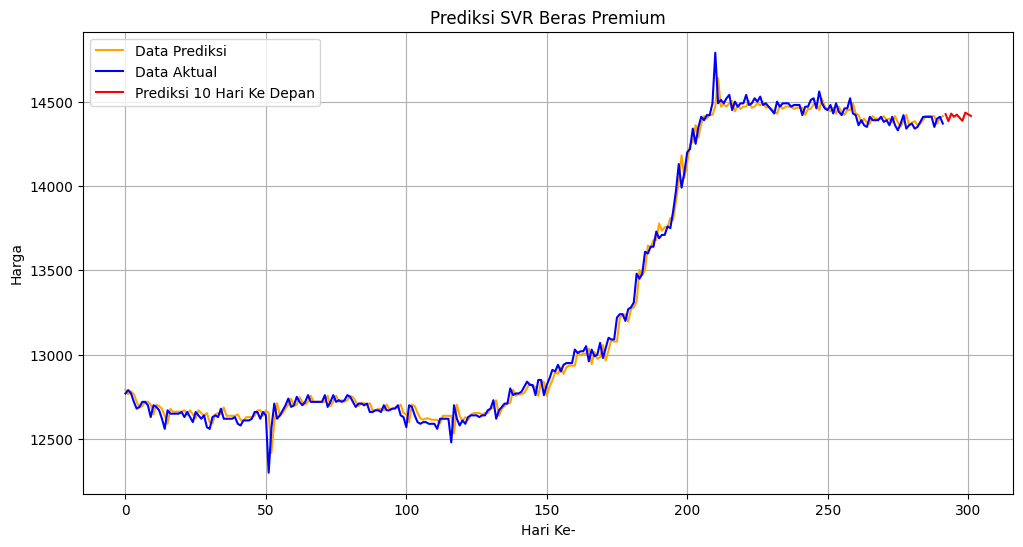

In [ ]:
# Plotting
plt.figure(figsize=(12, 6))
plt.plot(prediksi.index[:len(prediksi)-10], prediksi['Train_Predict_pre'][:len(prediksi)-10], color='orange', label='Data Prediksi')
plt.plot(prediksi.index[:len(prediksi)-10], prediksi['Data_Aktual'][:len(prediksi)-10], color='blue', label='Data Aktual')
plt.plot(prediksi.index[-10:], prediksi['Train_Predict_pre'][-10:], color='red', label='Prediksi 10 Hari Ke Depan')
plt.xlabel('Hari Ke-')
plt.ylabel('Harga')
plt.title('Prediksi SVR Beras Premium')
plt.legend()
plt.grid(True)
plt.show()

#Beras Medium

Fitting 5 folds for each of 36 candidates, totalling 180 fits
   Train_Predict_med  Data_Aktual
0       11612.690339      11540.0
1       11541.839876      11460.0
2       11474.977587      11640.0
3       11630.988497      11590.0
4       11585.674091      11280.0

Best parameters found by GridSearchCV:
{'C': 0.1, 'epsilon': 0.01, 'gamma': 1, 'kernel': 'rbf'}


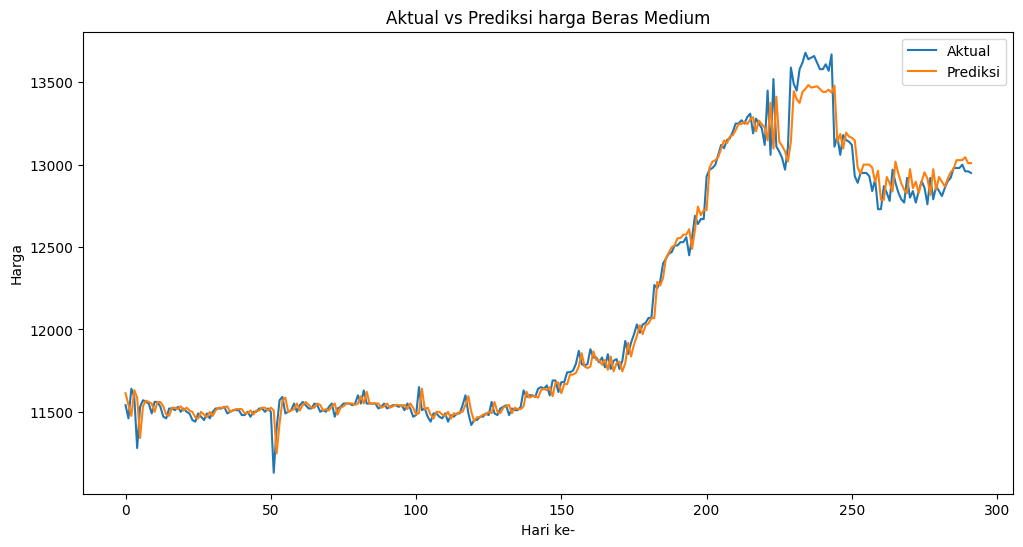

In [ ]:
beras_medium = data['Beras Medium']
scaler_med = MinMaxScaler(feature_range=(0, 1))
closedata22 = scaler_med.fit_transform(beras_medium.values.reshape(-1, 1))

# Define time steps for input sequence (adjust as needed)
time_step = 1

# Function to create sequences for SVR training
def create_sequences(data, time_step):
    X, y = [], []
    for i in range(len(data) - time_step):
        X.append(data[i:(i + time_step), 0])
        y.append(data[i + time_step, 0])
    return np.array(X), np.array(y)

# Create sequences for training data
X_train_med, y_train_med = create_sequences(closedata22, time_step)

# Reshape X_train_med for SVR
X_train_med = X_train_med.reshape(-1, time_step)

# Split the data into training and testing sets
split = int(0.8 * len(X_train_med))
X_train_med_split, X_test_med = X_train_med[:split], X_train_med[split:]
y_train_med_split, y_test_med = y_train_med[:split], y_train_med[split:]

# Define parameter grid for GridSearchCV
param_grid = {
    'kernel': ['rbf'],
    'C': [0.1, 1, 10],
    'gamma': [0.01, 0.1, 1],
    'epsilon': [0.01, 0.1, 1, 10]
}

# Create GridSearchCV model
grid_search = GridSearchCV(SVR(), param_grid=param_grid, scoring='neg_mean_squared_error', cv=5, verbose=1, n_jobs=-1)

# Fit GridSearchCV
grid_search.fit(X_train, y_train)

# Get the best model
best_svr_med = grid_search.best_estimator_

# Predict on training and testing data
train_predict_med = best_svr_med.predict(X_train_med_split)
test_predict_med = best_svr_med.predict(X_test_med)

# Inverse transform to get predictions in original scale
train_predict_med = scaler_med.inverse_transform(train_predict_med.reshape(-1, 1)).ravel()
test_predict_med = scaler_med.inverse_transform(test_predict_med.reshape(-1, 1)).ravel()
y_train_med = scaler_med.inverse_transform(y_train_med_split.reshape(-1, 1)).ravel()
y_test_med = scaler_med.inverse_transform(y_test_med.reshape(-1, 1)).ravel()

# Create DataFrame for predictions and actual data
svrtrain_med = pd.DataFrame({
    "Train_Predict_med": train_predict_med,
    "Data_Aktual": y_train_med  # Using original actual values for training data
})

# Print and show the results
print(svrtrain_med.head())
print("\nBest parameters found by GridSearchCV:")
print(grid_search.best_params_)

# Plot predictions vs actual data
plt.figure(figsize=(12, 6))
plt.plot(svrtrain_med.index, svrtrain_med['Data_Aktual'], label='Aktual')
plt.plot(svrtrain_med.index, svrtrain_med['Train_Predict_med'], label='Prediksi')
plt.title('Aktual vs Prediksi harga Beras Medium')
plt.xlabel('Hari ke-')
plt.ylabel('Harga')
plt.legend()
plt.show()

In [ ]:
# Print and show the results for training set
print("Training Set:")
print(svrtrain_med.head(183))

Training Set:
     Train_Predict_med  Data_Aktual
0         11612.690339      11540.0
1         11541.839876      11460.0
2         11474.977587      11640.0
3         11630.988497      11590.0
4         11585.674091      11280.0
..                 ...          ...
178       11971.390603      12030.0
179       12025.052692      12040.0
180       12035.861581      12070.0
181       12068.424880      12070.0
182       12068.424880      12270.0

[183 rows x 2 columns]


In [ ]:
# Menyimpan dataframe ke dalam file Excel
svrtrain_med.to_excel('prediksi_medium.xlsx', index=False)

In [ ]:
# Mengambil data terakhir dari test_data dan mengubah menjadi matriks 2D dengan ukuran (1,-1)
x_input = X_test[len(X_test)-time_step:].reshape(1,-1)
temp_input = list(x_input)  # Mengubah menjadi list tunggal
temp_input = temp_input[0].tolist()

from numpy import array

lst_output = []  # Menyimpan hasil prediksi
n_steps = time_step  # Menginisialisasi n_steps dengan nilai time_step
i = 0
pred_days = 10  # Menentukan berapa kali loop while akan dijalankan
while(i < pred_days):  # Loop akan terus berjalan selama nilai i < pred_days

    if len(temp_input) > time_step:
        x_input = np.array(temp_input[1:])
        x_input = x_input.reshape(1, -1)

        yhat = best_svr_med.predict(x_input)  # Melakukan prediksi dengan SVR
        temp_input.extend(yhat.tolist())  # Menambahkan hasil prediksi ke temp_input
        temp_input = temp_input[1:]  # Menyimpan data terbaru

        lst_output.extend(yhat.tolist())  # Menyimpan hasil prediksi
        i = i + 1  # Update iterasi

    else:
        yhat = best_svr_med.predict(x_input)  # Melakukan prediksi
        temp_input.extend(yhat.tolist())  # Menambahkan hasil prediksi

        lst_output.extend(yhat.tolist())  # Menyimpan hasil prediksi
        i = i + 1  # Update iterasi

print("Output of predicted next days: ", len(lst_output))

Output of predicted next days:  10


In [ ]:
#membuat array numpy last days yang berisi angka 1 hingga time_step
last_days=np.arange(1,time_step+1)
day_pred=np.arange(time_step+1,time_step+pred_days+1)
print(last_days)
print(day_pred)

[1]
[ 2  3  4  5  6  7  8  9 10 11]


In [ ]:
import plotly.graph_objects as go

temp_mat = np.empty((len(last_days) + pred_days + 1, 1))
temp_mat[:] = np.nan
temp_mat = temp_mat.reshape(1, -1).tolist()[0]

last_original_days_value = temp_mat
next_predicted_days_value = temp_mat

# Mengambil harga close 15 hari terakhir dari data Beras Premium
last_original_days_value[0:time_step + 1] = scaler.inverse_transform(closedata22[len(closedata22) - time_step:]).reshape(1, -1).tolist()[0]

# Mengambil prediksi harga close 10 hari ke depan untuk Beras Premium
next_predicted_days_value[time_step + 1:] = scaler.inverse_transform(np.array(lst_output).reshape(-1, 1)).reshape(1, -1).tolist()[0]

new_pred_plot = pd.DataFrame({
    'last_original_days_value': last_original_days_value,
    'next_predicted_days_value': next_predicted_days_value
})

names = cycle(['Harga Medium 15 hari terakhir', 'Prediksi harga Medium 10 hari ke depan'])

fig = px.line(new_pred_plot, x=new_pred_plot.index, y=[new_pred_plot['last_original_days_value'],
                                                      new_pred_plot['next_predicted_days_value']],
              labels={'value': 'Harga Beras Medium', 'index': 'Timestamp'})
fig.update_traces(line_color='blue', selector=dict(name='Harga Medium 15 hari terakhir'))
fig.update_traces(line_color='red', selector=dict(name='Prediksi harga Medium 10 hari ke depan'))

fig.update_layout(title_text='Perbandingan 15 hari terakhir dengan 10 hari ke depan untuk Harga Beras Medium',
                  plot_bgcolor='white', font_size=15, font_color='black', legend_title_text='Harga')
fig.for_each_trace(lambda t: t.update(name=next(names)))

fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)
fig.show()

In [ ]:
prediksi = pd.read_excel('prediksi_medium.xlsx')
prediksi

,Train_Predict_med,Data_Aktual
0,11612.690339,11540
1,11541.839876,11460
2,11474.977587,11640
3,11630.988497,11590
4,11585.674091,11280
...,...,...
287,13027.756796,12980
288,13027.756796,13000
289,13045.585827,12960
290,13009.693728,12960


In [ ]:
# Membaca DataFrame dari file Excel
prediksi = pd.read_excel('prediksi_medium.xlsx')

# Mengambil nilai terakhir dari kolom 'Train_Predict_med'
last_value = prediksi['Train_Predict_med'].iloc[-1]

# Membuat array dengan 10 nilai prediksi baru (contoh nilai acak)
next_predictions = np.random.randint(last_value - 50, last_value + 50, size=10)

# Membuat DataFrame baru untuk nilai prediksi 10 hari ke depan
new_rows = pd.DataFrame({'Train_Predict_med': next_predictions})

# Menggabungkan DataFrame 'prediksi' dengan DataFrame 'new_rows'
prediksi = pd.concat([prediksi, new_rows], ignore_index=True)

# Menyimpan DataFrame yang diperbarui ke file Excel
prediksi.to_excel('prediksi_medium.xlsx', index=False)

# Menampilkan DataFrame prediksi setelah diperbarui
print(prediksi.tail(20))  # Menampilkan 20 baris terakhir untuk memastikan prediksi 10 hari ke depan sudah ditambahkan

     Train_Predict_med  Data_Aktual
282       12867.313183      12860.0
283       12916.056764      12900.0
284       12954.153674      12920.0
285       12972.886707      12980.0
286       13027.756796      12980.0
287       13027.756796      12980.0
288       13027.756796      13000.0
289       13045.585827      12960.0
290       13009.693728      12960.0
291       13009.693728      12950.0
292       12998.000000          NaN
293       13008.000000          NaN
294       12979.000000          NaN
295       13042.000000          NaN
296       12996.000000          NaN
297       13036.000000          NaN
298       12998.000000          NaN
299       12993.000000          NaN
300       12997.000000          NaN
301       12971.000000          NaN


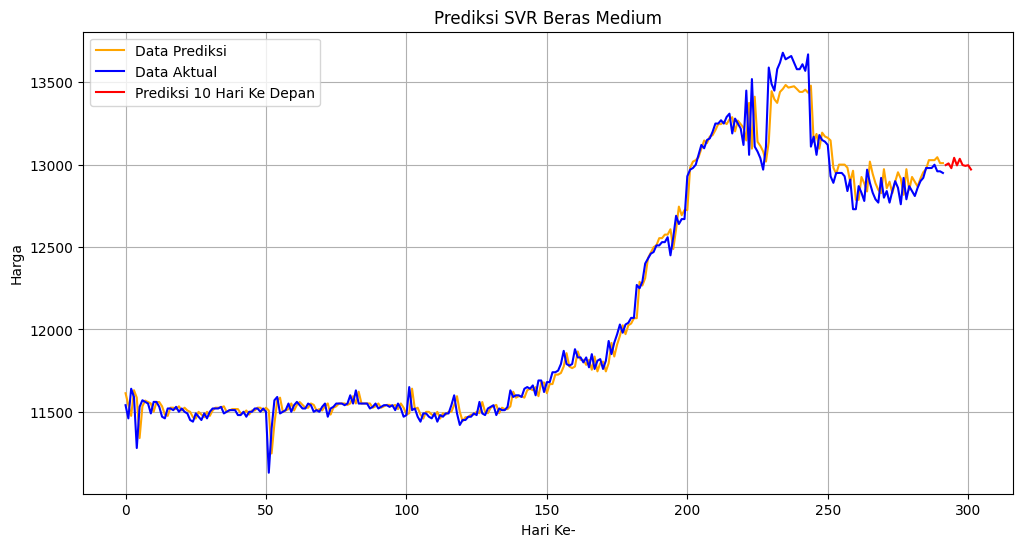

In [ ]:
# Plotting
plt.figure(figsize=(12, 6))
plt.plot(prediksi.index[:len(prediksi)-10], prediksi['Train_Predict_med'][:len(prediksi)-10], color='orange', label='Data Prediksi')
plt.plot(prediksi.index[:len(prediksi)-10], prediksi['Data_Aktual'][:len(prediksi)-10], color='blue', label='Data Aktual')
plt.plot(prediksi.index[-10:], prediksi['Train_Predict_med'][-10:], color='red', label='Prediksi 10 Hari Ke Depan')
plt.xlabel('Hari Ke-')
plt.ylabel('Harga')
plt.title('Prediksi SVR Beras Medium')
plt.legend()
plt.grid(True)
plt.show()

#R2 Score

In [ ]:
print("Train data R2 score:", r2_score(y_train_pre, train_predict_pre))
print("Test data R2 score:", r2_score(y_test_pre, test_predict_pre))

Train data R2 score: 0.9951700438736982
Test data R2 score: 0.6556892069229671


In [ ]:
print("Train data R2 score:", r2_score(y_train_med, train_predict_med))
print("Test data R2 score:", r2_score(y_test_med, test_predict_med))

Train data R2 score: 0.983953652167251
Test data R2 score: 0.6502598140105829


#MSE dan RSME

In [ ]:
from sklearn.model_selection import GridSearchCV, cross_val_score

# Select and normalize Beras Premium data
scaler = MinMaxScaler(feature_range=(0, 1))
closedata21 = scaler.fit_transform(data['Beras Premium'].values.reshape(-1, 1))

# Define time steps for input sequence (adjust as needed)
time_step = 1

# Function to create sequences for SVR training
def create_sequences(data, time_step):
    X, y = [], []
    for i in range(len(data) - time_step):
        X.append(data[i:(i + time_step), 0])
        y.append(data[i + time_step, 0])
    return np.array(X), np.array(y)

# Create sequences for training data
X_train_pre, y_train_pre = create_sequences(closedata21, time_step)

# Reshape X_train_pre for SVR
X_train_pre = X_train_pre.reshape(-1, time_step)

# Split the data into training and testing sets (90:10 split)
split = int(0.8 * len(X_train_pre))
X_train, X_test = X_train_pre[:split], X_train_pre[split:]
y_train, y_test = y_train_pre[:split], y_train_pre[split:]

# Define parameter grid for GridSearchCV
param_grid = {
    'kernel': ['rbf'],
    'C': [0.1, 1, 10],
    'gamma': [0.01, 0.1, 1],
    'epsilon': [0.01, 0.1, 1, 10]
}

# Create GridSearchCV model
grid_search = GridSearchCV(SVR(), param_grid=param_grid, scoring='neg_mean_squared_error', cv=5, verbose=1, n_jobs=-1)

# Fit GridSearchCV
grid_search.fit(X_train, y_train)

# Get the best model
best_svr_pre = grid_search.best_estimator_

# Cross-validation with best model on the whole dataset
cv_scores = cross_val_score(best_svr_pre, X_train_pre, y_train_pre, cv=10, scoring='neg_mean_squared_error', n_jobs=-1)
cv_rmse_scores = np.sqrt(-cv_scores)

# Print cross-validation results
print("Cross-validation MSE scores:", -cv_scores)
print("Cross-validation RMSE scores:", cv_rmse_scores)
print("Averange MSE Premium:", np.mean(-cv_scores))
print("Average RMSE Premium:", np.mean(cv_rmse_scores))

Fitting 5 folds for each of 36 candidates, totalling 180 fits
Cross-validation MSE scores: [0.00025993 0.00080929 0.00019573 0.00045049 0.00072829 0.00109218
 0.00017879 0.00024819 0.00082249 0.001181  ]
Cross-validation RMSE scores: [0.01612236 0.02844801 0.01399031 0.0212248  0.02698682 0.03304815
 0.01337142 0.01575419 0.02867909 0.03436573]
Averange MSE Premium: 0.0005966392192073553
Average RMSE Premium: 0.023199087892129273


In [ ]:
from sklearn.model_selection import GridSearchCV, cross_val_score

# Select and normalize Beras Medium data
scaler_med = MinMaxScaler(feature_range=(0, 1))
closedata_med = scaler_med.fit_transform(data['Beras Medium'].values.reshape(-1, 1))

# Define time steps for input sequence (adjust as needed)
time_step = 1

# Function to create sequences for SVR training
def create_sequences(data, time_step):
    X, y = [], []
    for i in range(len(data) - time_step):
        X.append(data[i:(i + time_step), 0])
        y.append(data[i + time_step, 0])
    return np.array(X), np.array(y)

# Create sequences for training data for Beras Medium
X_train_med, y_train_med = create_sequences(closedata_med, time_step)

# Reshape X_train_med for SVR
X_train_med = X_train_med.reshape(-1, time_step)

# Split the data into training and testing sets (90:10 split)
split_med = int(0.8 * len(X_train_med))
X_train_med, X_test_med = X_train_med[:split_med], X_train_med[split_med:]
y_train_med, y_test_med = y_train_med[:split_med], y_train_med[split_med:]

# Define parameter grid for GridSearchCV for Beras Medium
param_grid = {
    'kernel': ['rbf'],
    'C': [0.1, 1, 10],
    'gamma': [0.01, 0.1, 1],
    'epsilon': [0.01, 0.1, 1, 10]
}

# Create GridSearchCV model for Beras Medium
grid_search_med = GridSearchCV(SVR(), param_grid=param_grid, scoring='neg_mean_squared_error', cv=5, verbose=1, n_jobs=-1)

# Fit GridSearchCV for Beras Medium
grid_search_med.fit(X_train_med, y_train_med)

# Get the best model for Beras Medium
best_svr_med = grid_search_med.best_estimator_

# Cross-validation with best model on the whole dataset for Beras Medium
cv_scores_med = cross_val_score(best_svr_med, X_train_med, y_train_med, cv=10, scoring='neg_mean_squared_error', n_jobs=-1)
cv_rmse_scores_med = np.sqrt(-cv_scores_med)

# Print cross-validation results for Beras Medium
print("Cross-validation MSE scores (Beras Medium):", -cv_scores_med)
print("Cross-validation RMSE scores (Beras Medium):", cv_rmse_scores_med)
print("Average MSE (Beras Medium):", np.mean(-cv_scores_med))
print("Average RMSE (Beras Medium):", np.mean(cv_rmse_scores_med))

Fitting 5 folds for each of 36 candidates, totalling 180 fits
Cross-validation MSE scores (Beras Medium): [0.00120817 0.00130656 0.00020414 0.00039939 0.00030773 0.00053101
 0.00106386 0.00507521 0.00235474 0.00091908]
Cross-validation RMSE scores (Beras Medium): [0.03475877 0.03614638 0.01428783 0.01998481 0.01754234 0.02304357
 0.03261685 0.07124049 0.04852563 0.03031639]
Average MSE (Beras Medium): 0.0013369894198867768
Average RMSE (Beras Medium): 0.03284630680262036


#menghitung kernel rbf